In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation, rc
%load_ext autoreload
%autoreload 2

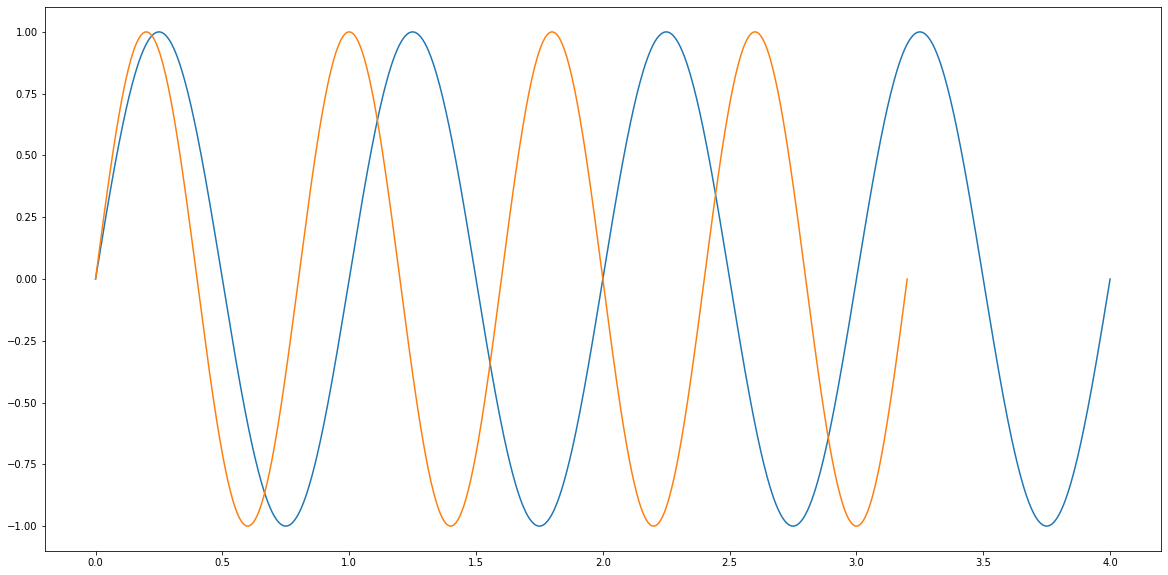

In [4]:
# Plot a sine wave with period 1
plt.figure(figsize=(20,10))

def generate_sine(period, num_cycles):
    x = np.linspace(0, num_cycles*period, 1000)
    y = np.sin(2*np.pi*x/period)
    return x, y

def plot_sine(period, num_cycles, ax=None):
    x, y = generate_sine(period, num_cycles)
    if ax is None:
        plt.plot(x, y)
    else:
        ax.plot(x, y)
plot_sine(1, 4)
plot_sine(0.8, 4)

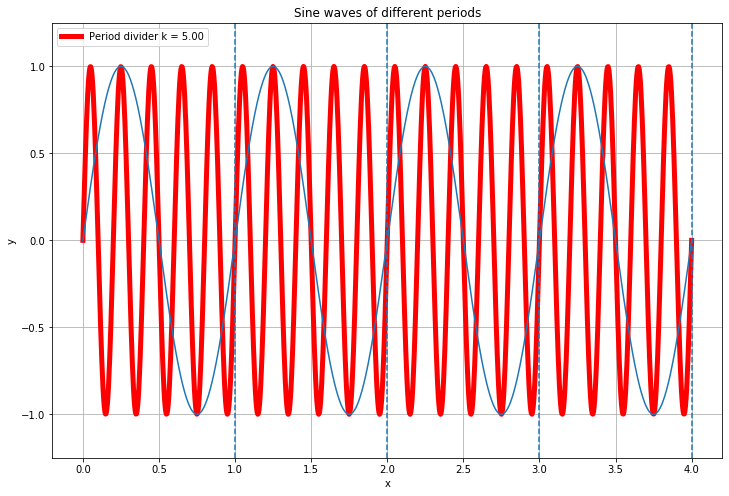

In [5]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Sine waves of different periods')
ax.set_xlabel('x')
ax.set_ylabel('y')
# ax.set_xlim(( -3, 3))
ax.set_ylim((-1.25, 1.25))



line_input, = ax.plot([], [], 'g', lw=0.5, label='input')
# line_output, = ax.plot([], [], 'kv', lw=20, label='output codebook vector')
# line_preproj, = ax.plot([], [], 'kx', lw=20, label='pre-projection vector')
# ax.scatter(normalized[:,0], normalized[:,1], label='normalized_codebook')
# ax.scatter(codebook[:,0], codebook[:,1], label='codebook')
num_cycles = 4
period = 1
x,y = generate_sine(period, num_cycles)

for i in range(1,num_cycles+1):
    plt.axvline(i*period, linestyle='--')
    
ax.plot(x, y)
ax.grid()

# initialization function: plot the background of each frame
def init():
    line_input.set_data([], [])
    return (line_input,)

# animation function. This is called sequentially

num_frames = 200
def animate(t):
    t += 1
    num_harmonics = 4
    k = t * num_harmonics/num_frames + 1
    period = 1/k
    x,y = generate_sine(period, num_cycles*k)
    line_input.set_data(x, y)
    line_input.set_label(f"Period divider k = {k:0.02f}")
    if int(k) == k:
        line_input.set_color('r')
        line_input.set_linewidth(5)
    else:
        line_input.set_color('g')
        line_input.set_linewidth(0.5)
    ax.legend()
    
    return (line_input,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=num_frames, interval=300, blit=True)

HTML(anim.to_html5_video())

In [6]:
# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=5, metadata=dict(artist='Me'), bitrate=1800)

anim.save('harmonic_animation.mp4', writer=writer)

# Nonlinear system

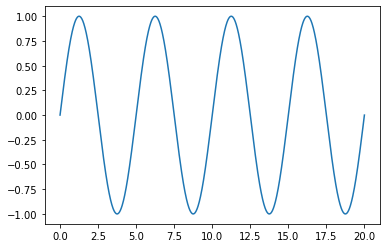

In [7]:
x,y = generate_sine(5, 4)
plt.plot(x, y)

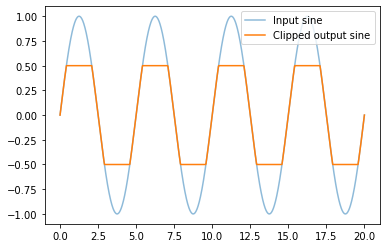

In [8]:
# Clipping system
y_clip = np.clip(y, -0.5, 0.5)
plt.plot(x, y, alpha=0.5, label='Input sine')
plt.plot(x, y_clip, label='Clipped output sine')
plt.legend()
plt.savefig('clipped_sine.png', dpi=200)

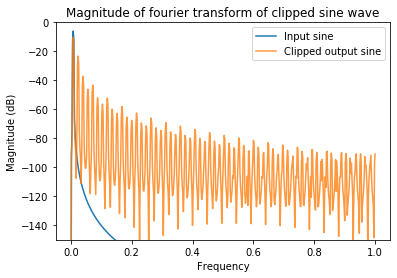

In [9]:
plt.magnitude_spectrum(y, scale='dB', label='Input sine');
plt.magnitude_spectrum(y_clip, scale='dB', alpha=0.8, label='Clipped output sine');
plt.ylim([-150,0])
plt.legend()
plt.title('Magnitude of fourier transform of clipped sine wave')
plt.savefig('clipped_sine_fft.png', dpi=200)

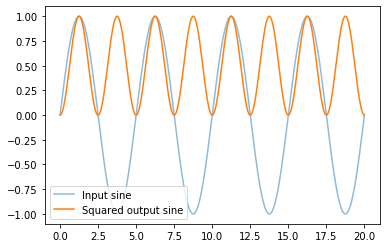

In [10]:
# Square system
y_square = y**2
plt.plot(x, y, alpha=0.5, label='Input sine')
plt.plot(x, y_square, label='Squared output sine')
plt.legend()
plt.savefig('squared_sine.png', dpi=200)

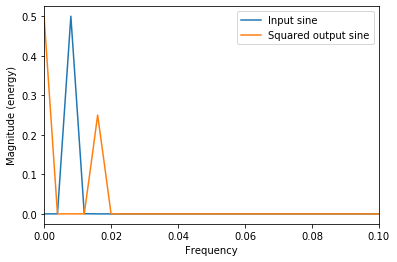

In [11]:
plt.magnitude_spectrum(y, scale='linear',label='Input sine');
plt.magnitude_spectrum(y_square, scale='linear', label='Squared output sine');
plt.legend()
plt.xlim([0,0.1])
plt.savefig('squared_sine_fft.png', dpi=200)